In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
import getTA

In [3]:
import yfinance as yf
df = yf.download('AAPL','2011-1-1','2021-1-1')

[*********************100%***********************]  1 of 1 completed


In [75]:
df_ = df.drop(columns='Adj Close').iloc[:,:5]
list= []
for i in df_.columns:
    list.append(i.lower())
df_.columns = list

In [79]:
TA_ = getTA.get_ta(df_).dropna()

In [84]:
TA = TA_.drop(columns=['open','high','low'])

In [85]:
for i in [1,5,12]:
    TA = TA.join(df.Close.pct_change(i).rename('ret {}'.format(i)))
    TA = TA.join(df.Close.diff(i).rename('diff {}'.format(i)))
TA

,close,volume,m_rsi,m_roc,m_cmo,m_wr,vm_cmf,vm_mfi,vm_fi,vm_eom,...,t_cci,t_dpo,t_kst,t_adx,ret 1,diff 1,ret 5,diff 5,ret 12,diff 12
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-04,12.857143,453266800,60.714635,0.027794,1.422,-18.027896,0.203377,63.350106,9.779102e+06,0.000833,...,85.149708,0.360590,8.014074,10.370849,0.001224,0.015715,0.034007,0.422857,0.000278,0.003572
2011-03-07,12.691429,546123200,55.566878,-2.139731,-7.372,-35.099281,0.160690,57.129158,-4.546541e+06,-0.006122,...,38.828797,0.172268,25.289137,10.126291,-0.012889,-0.165714,0.006087,0.076786,-0.021397,-0.277500
2011-03-08,12.705714,356316800,55.913882,-0.708904,-12.545,-33.627674,0.151191,52.767368,-3.169890e+06,-0.003070,...,22.732632,-0.111089,24.671305,9.899202,0.001126,0.014285,0.018465,0.230357,-0.007089,-0.090714
2011-03-09,12.588214,453306000,52.296139,0.544836,-10.191,-38.413459,0.116050,46.462752,-1.032613e+07,-0.002511,...,-11.518020,-0.533000,23.112552,9.923729,-0.009248,-0.117500,0.000994,0.012500,0.005448,0.068213
2011-03-10,12.381071,507539200,46.574952,2.380319,-7.038,-62.630574,0.074997,46.709349,-2.386999e+07,-0.006542,...,-78.501669,-0.369267,19.604789,10.692901,-0.016455,-0.207143,-0.035849,-0.460358,0.023803,0.287857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,131.970001,54930100,67.866386,6.102271,36.696,-17.110814,0.117849,54.867918,1.032270e+08,2.900096,...,143.563911,-3.123001,86.768851,20.490431,0.007712,1.009995,0.025408,3.270004,0.061023,7.590004
2020-12-28,136.690002,124486200,73.597952,12.243393,46.470,-3.781234,0.160401,56.287610,1.724196e+08,9.676023,...,182.779445,-2.668003,95.942448,22.103938,0.035766,4.720001,0.079188,10.029999,0.122434,14.910004
2020-12-29,134.869995,121047300,68.522632,9.436869,50.914,-21.030042,0.114559,57.631975,1.163158e+08,4.190919,...,162.417511,-4.288997,102.652471,23.837381,-0.013315,-1.820007,0.051782,6.639999,0.094369,11.629997


## 1. Correlation Analysis

In [130]:
corr = TA.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,close,volume,m_rsi,m_roc,m_cmo,m_wr,vm_cmf,vm_mfi,vm_fi,vm_eom,vl_bbp,vl_atr,t_macdd,t_trix,t_cci,t_dpo,t_kst,t_adx,ret 1,diff 1,ret 5,diff 5,ret 12,diff 12
close,1.00,-0.44,0.19,0.17,0.15,0.15,0.17,0.10,0.19,0.06,0.17,0.87,0.05,0.27,0.17,-0.12,0.26,0.12,0.05,0.09,0.11,0.23,0.17,0.33
volume,-0.44,1.00,-0.18,-0.14,-0.16,-0.18,-0.16,-0.15,-0.16,-0.02,-0.20,-0.24,-0.08,-0.08,-0.19,0.07,-0.08,0.09,-0.07,-0.05,-0.12,-0.11,-0.14,-0.16
m_rsi,0.19,-0.18,1.00,0.82,0.88,0.83,0.66,0.79,0.67,0.13,0.88,-0.04,0.43,0.70,0.86,-0.27,0.72,0.30,0.32,0.24,0.65,0.49,0.82,0.61
m_roc,0.17,-0.14,0.82,1.00,0.88,0.81,0.50,0.76,0.75,0.15,0.83,-0.02,0.67,0.49,0.81,-0.50,0.52,0.11,0.28,0.23,0.64,0.54,1.00,0.81
m_cmo,0.15,-0.16,0.88,0.88,1.00,0.84,0.58,0.85,0.59,0.10,0.86,-0.03,0.52,0.51,0.84,-0.34,0.54,0.20,0.24,0.18,0.56,0.43,0.88,0.64
m_wr,0.15,-0.18,0.83,0.81,0.84,1.00,0.49,0.71,0.64,0.18,0.92,-0.01,0.55,0.34,0.89,-0.33,0.36,0.11,0.43,0.32,0.74,0.56,0.81,0.61
vm_cmf,0.17,-0.16,0.66,0.50,0.58,0.49,1.00,0.56,0.40,0.06,0.54,0.00,0.23,0.53,0.53,-0.11,0.56,0.33,0.15,0.12,0.33,0.24,0.50,0.36
vm_mfi,0.10,-0.15,0.79,0.76,0.85,0.71,0.56,1.00,0.51,0.08,0.75,-0.07,0.47,0.50,0.74,-0.25,0.54,0.18,0.15,0.12,0.46,0.35,0.76,0.54
vm_fi,0.19,-0.16,0.67,0.75,0.59,0.64,0.40,0.51,1.00,0.35,0.69,-0.03,0.67,0.42,0.68,-0.35,0.45,0.09,0.44,0.44,0.73,0.76,0.75,0.77
vm_eom,0.06,-0.02,0.13,0.15,0.10,0.18,0.06,0.08,0.35,1.00,0.17,-0.01,0.22,-0.01,0.16,-0.05,-0.00,-0.02,0.38,0.63,0.23,0.40,0.15,0.26


In [132]:
h = 0.85

list =[]
for i in range(len(np.where(abs(corr)>=h)[0])):
    list.append(tuple((corr.columns[np.where(abs(corr)>=h)[0][i]],corr.columns[np.where(abs(corr)>=h)[1][i]])))
list

[('close', 'close'),
 ('close', 'vl_atr'),
 ('volume', 'volume'),
 ('m_rsi', 'm_rsi'),
 ('m_rsi', 'm_cmo'),
 ('m_rsi', 'vl_bbp'),
 ('m_rsi', 't_cci'),
 ('m_roc', 'm_roc'),
 ('m_roc', 'm_cmo'),
 ('m_roc', 'ret 12'),
 ('m_cmo', 'm_rsi'),
 ('m_cmo', 'm_roc'),
 ('m_cmo', 'm_cmo'),
 ('m_cmo', 'vm_mfi'),
 ('m_cmo', 'vl_bbp'),
 ('m_cmo', 'ret 12'),
 ('m_wr', 'm_wr'),
 ('m_wr', 'vl_bbp'),
 ('m_wr', 't_cci'),
 ('vm_cmf', 'vm_cmf'),
 ('vm_mfi', 'm_cmo'),
 ('vm_mfi', 'vm_mfi'),
 ('vm_fi', 'vm_fi'),
 ('vm_eom', 'vm_eom'),
 ('vl_bbp', 'm_rsi'),
 ('vl_bbp', 'm_cmo'),
 ('vl_bbp', 'm_wr'),
 ('vl_bbp', 'vl_bbp'),
 ('vl_bbp', 't_cci'),
 ('vl_atr', 'close'),
 ('vl_atr', 'vl_atr'),
 ('t_macdd', 't_macdd'),
 ('t_trix', 't_trix'),
 ('t_trix', 't_kst'),
 ('t_cci', 'm_rsi'),
 ('t_cci', 'm_wr'),
 ('t_cci', 'vl_bbp'),
 ('t_cci', 't_cci'),
 ('t_dpo', 't_dpo'),
 ('t_kst', 't_trix'),
 ('t_kst', 't_kst'),
 ('t_adx', 't_adx'),
 ('ret 1', 'ret 1'),
 ('diff 1', 'diff 1'),
 ('ret 5', 'ret 5'),
 ('diff 5', 'diff 5'),
 (

## 2. PCA Analysis

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [134]:
scaler = StandardScaler()
X=scaler.fit_transform(TA)

In [135]:
pca = PCA(4)
X_pc = pca.fit_transform(X)

In [136]:
components_ = pca.components_
n_components_ = pca.n_components_
explained_variance_ratio_ = pca.explained_variance_ratio_

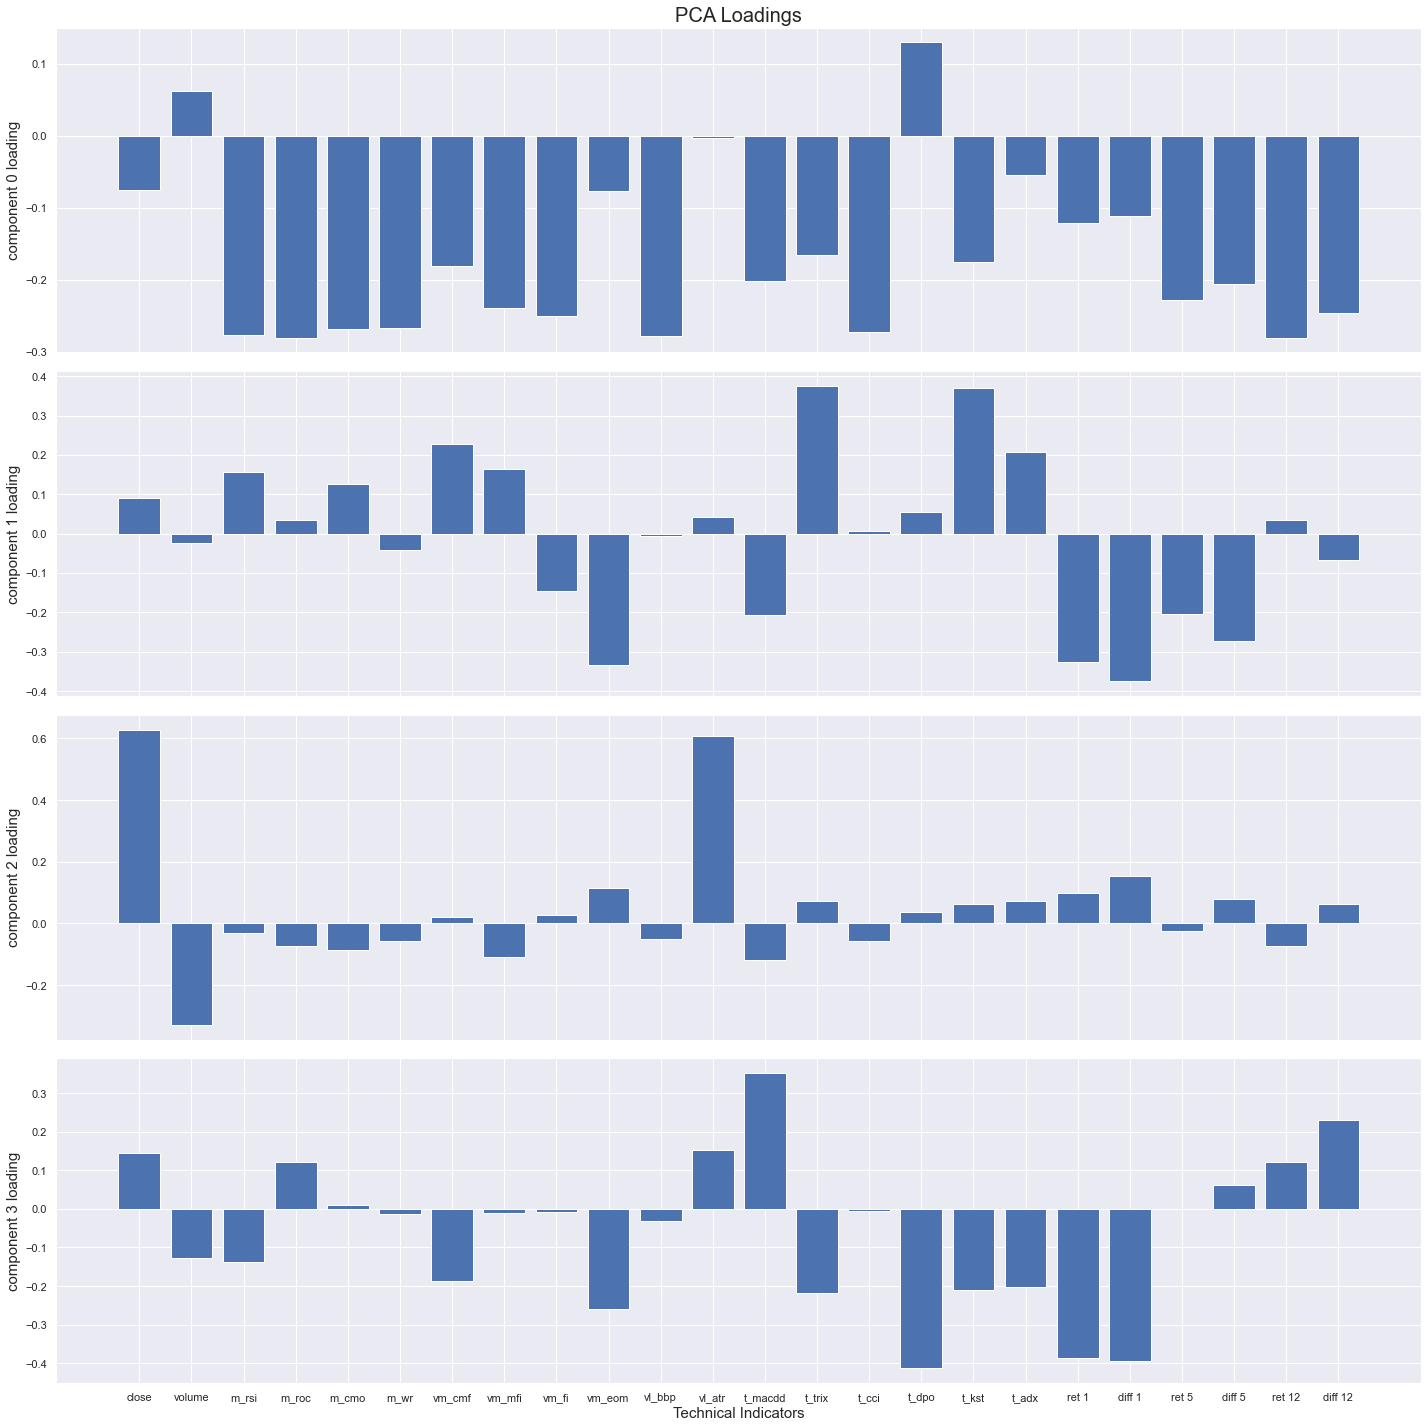

In [137]:
n_loadings = n_components_
fig, axs = plt.subplots(n_loadings, 1, sharex=True, figsize=(20, 20))
for i in range(n_loadings):
        axs[i].bar([i for i in TA.columns],
                    components_[i])
        axs[i].set_ylabel('component '+str(i)+' loading',
                            fontsize=15)
axs[0].set_title('PCA Loadings', fontsize=20)
axs[i].set_xlabel('Technical Indicators', fontsize=15)

fig.tight_layout()